In [1]:
import csv, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time_max = 200

df_apple = pd.read_csv('data/apple_prices.csv', names=['Price'], header=None)
apple = df_apple.Price.tolist()
apple = apple[:time_max]

In [3]:
# Returns an n period exponential moving average for the time series data
def ema(ls, n):
    
    ema = []
    time = 1
    
    # get the average of the first n data points
    head = sum(ls[:n])/n
    multiplier = 2/float(1 + n)
    ema.append(head)

    # EMA(current) = ((Price(current) - EMA(prev) ) * Multiplier) + EMA(prev)
    ema.append(((ls[n] - head) * multiplier) + head)

    # calculate the rest of the values
    for price in ls[n+1:]:
        tmp = ((price - ema[time]) * multiplier) + ema[time]
        time = time + 1
        ema.append(tmp)
    return ema

In [4]:
# Returns an n period weighted moving average for the time series data
def wma(ls, n):
    
    weights = []
    wma = []

    for i in range(0, n):
        w = (2 * (i + 1)/(n * (n + 1)))
        weights.append(w);
    
    for i in range(0, len(ls)-n):
        tmp = 0
        for j in range(0, n):
            tmp += ls[i+j] * weights[j]
        wma.append(tmp)
    
    return wma

In [5]:
# Extract the sign of a number
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [6]:
# A flipped ReLU function
def flip_relu(x):
    if x < 0:
        return -1
    else:
        return 0

In [7]:
# # Returns the trading decisions based on the MACD signals
# def dec(macd):
    
#     decisions = []

#     for i in range(1, len(macd)):
#         if (macd[i-1]*macd[i]) < 0:
#             if (macd[i] - macd[i-1]) > 0:
#                 decisions.append(1)
#             elif (macd[i] - macd[i-1]) < 0:
#                 decisions.append(-1)
#             else:
#                 decisions.append(0)
#         else:
#             decisions.append(0)
            
#     return decisions

In [8]:
# Return the trading decisions based on the MACD signals
def dec(macd):
    
    decisions = []

    for i in range(1, len(macd)):
        dec_point = flip_relu(macd[i-1]*macd[i])
        decision = sign(dec_point*(macd[i-1] - macd[i]))
        decisions.append(decision)
            
    return decisions

In [9]:
# Return the trading decisions based on the MACD signals by approximation
def dec_approx(macd, norm):
    
    decisions = []

    for i in range(1, len(macd)):
        mt_1 = norm*macd[i-1]
        mt = norm*macd[i]
        x = mt_1*mt
        
        # tmp = -0.000078280916956*x**9+0.000275328070180*x**8+0.002499016062220*x**7-0.009008013569848*x**6 \
        #     -0.025256283949079*x**5+0.098449113902521*x**4+0.088229752196169*x**3-0.517348874138436*x**2 \
        #     +0.447474594415914*x-0.075305315146927
        tmp = -0.0001*x**9 + 0.0003*x**8+0.0025*x**7-0.009*x**6-0.0253*x**5+0.0984*x**4+0.0882*x**3 \
            -0.5173*x**2+0.4475*x-0.0753
        # tmp = 0.00002635*x**8 - 0.0003472*x**6 + 0.0052083*x**4 - 0.2*x**2 + 0.25*x - 0.061
        # tmp = 1.6167*x**8 - 3.7628*x**6 + 3.1647*x**4 - 1.4739*x**2 + 0.5*x - 0.0338
        
        tmp *= (mt_1 - mt)
        decisions.append(tmp)
        
    return decisions

In [10]:
def list_to_csv(ls, filename):

    with open(filename, "w") as outfile:
        for x in ls:
            outfile.write(str(x))
            outfile.write("\n")

In [11]:
# ema12 = ema(apple, 12)
# ema26 = ema(apple, 26)

# ema12 = ema12[14:]
# ema_diff = [ema12_i - ema26_i for ema12_i, ema26_i in zip(ema12, ema26)]

# ema9 = ema(ema_diff, 9)

# ema_diff = ema_diff[8:]
# macd_ema = [ema_diff_i - ema9_i for ema_diff_i, ema9_i in zip(ema_diff, ema9)]

# decisions_ema = dec(macd_ema)
# decisions_ema_approx = dec_approx(macd_ema)

# apple = apple[33:]
# ema12 = ema12[8:]
# ema26 = ema26[8:]

In [12]:
# # Plot the exponential moving averages, apple stock prices and trading decisions
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (20, 20))
# x_range = np.arange(0, len(macd_ema), 1)
# x_range2 = np.arange(0, len(decisions_ema), 1)
# x, y = [0, len(macd_ema)], [0, 0]

# ax1.plot(apple, color='red', alpha=0.5, label='apple stock price')
# ax1.plot(ema12, color='blue', alpha=0.5, label='wma12')
# ax1.plot(ema26, color='green', alpha=0.5, label='wma26')
# ax1.set_title('Apple Stock Prices')
# ax1.legend()

# ax2.plot(x, y)
# ax2.bar(x_range, macd_ema, color='blue', alpha=0.5, label='macd')
# ax2.plot(ema9, color='red', alpha=0.5, label='wma9(wma12-wma26)')
# ax2.plot(ema_diff, color='green', alpha=0.5, label='wma12-wma26')
# ax2.set_title('MACD Signal')
# ax2.legend()

# ax3.bar(x_range2, decisions_ema_approx, color='orange', alpha=0.5, label='decisions')
# ax3.plot(x, y)
# ax3.set_title('Approximate Trading Decisions')
# ax3.legend()

# ax4.bar(x_range2, decisions_ema, color='orange', alpha=0.5, label='decisions')
# ax4.plot(x, y)
# ax4.set_title('Trading Decisions')
# ax4.legend()

# plt.show()

In [13]:
apple = df_apple.Price.tolist()
apple = apple[:time_max]

wma12 = wma(apple, 12)
wma26 = wma(apple, 26)

wma12 = wma12[14:]
wma_diff = [wma12_i - wma26_i for wma12_i, wma26_i in zip(wma12, wma26)]

wma9 = wma(wma_diff, 9)

wma_diff = wma_diff[9:]
macd_wma = [wma_diff_i - wma9_i for wma_diff_i, wma9_i in zip(wma_diff, wma9)]

decisions_wma = dec(macd_wma)
decisions_wma_approx = dec_approx(macd_wma, 0.5)

apple = apple[35:]
wma12 = wma12[9:]
wma26 = wma26[9:]

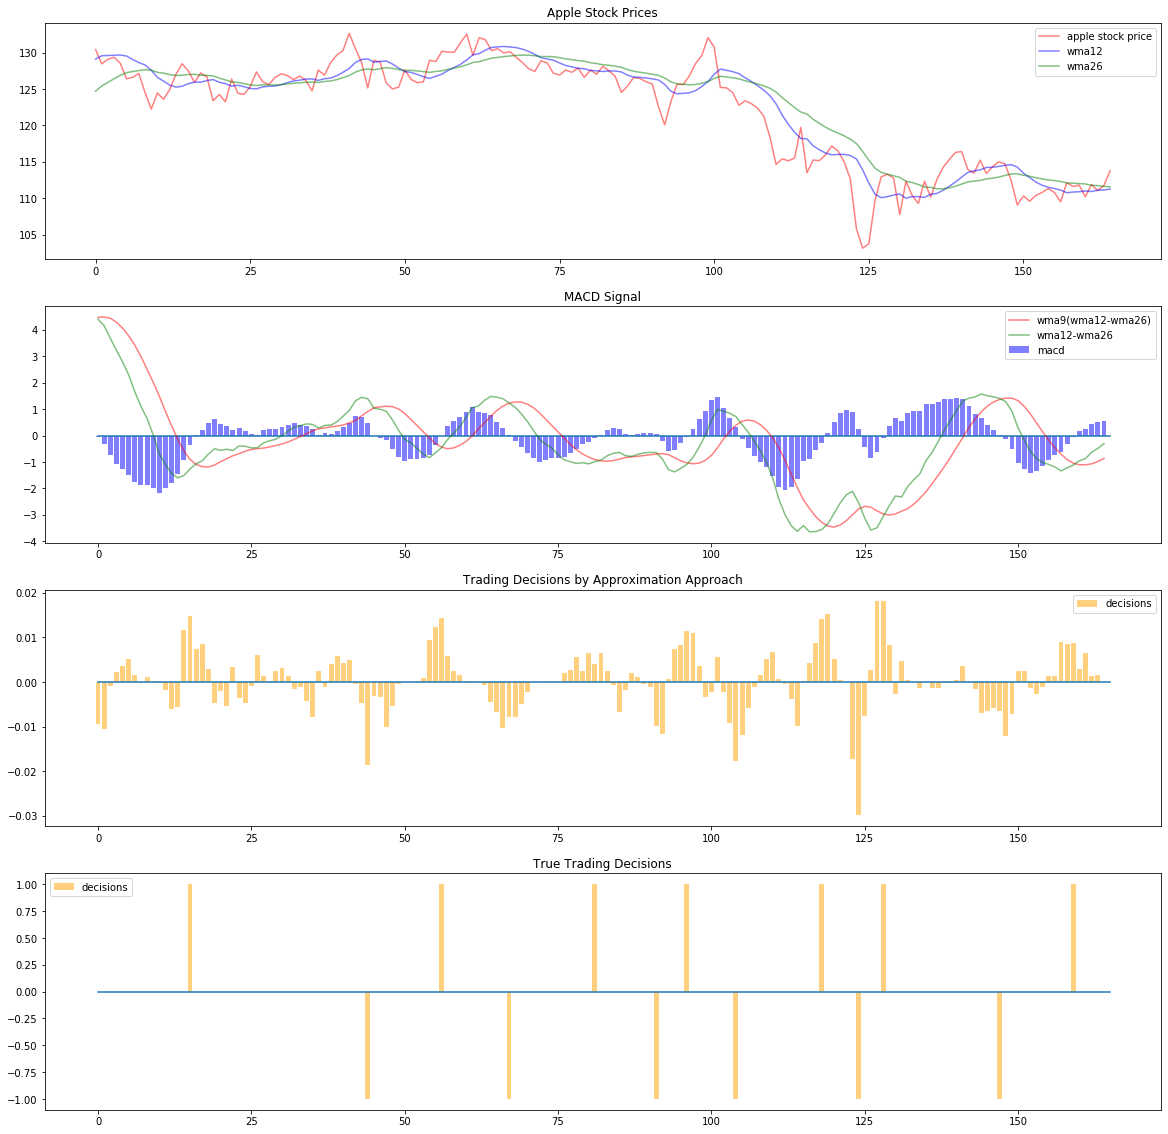

In [14]:
# Plot the weighted moving averages, apple stock prices and trading decisions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (20, 20))
x_range = np.arange(0, len(macd_wma), 1)
x_range2 = np.arange(0, len(decisions_wma), 1)
x, y = [0, len(macd_wma)], [0, 0]

ax1.plot(apple, color='red', alpha=0.5, label='apple stock price')
ax1.plot(wma12, color='blue', alpha=0.5, label='wma12')
ax1.plot(wma26, color='green', alpha=0.5, label='wma26')
ax1.set_title('Apple Stock Prices')
ax1.legend()

ax2.plot(x, y)
ax2.bar(x_range, macd_wma, color='blue', alpha=0.5, label='macd')
ax2.plot(wma9, color='red', alpha=0.5, label='wma9(wma12-wma26)')
ax2.plot(wma_diff, color='green', alpha=0.5, label='wma12-wma26')
ax2.set_title('MACD Signal')
ax2.legend()

ax3.bar(x_range2, decisions_wma_approx, color='orange', alpha=0.5, label='decisions')
ax3.plot(x, y)
ax3.set_title('Trading Decisions by Approximation Approach')
ax3.legend()

ax4.bar(x_range2, decisions_wma, color='orange', alpha=0.5, label='decisions')
ax4.plot(x, y)
ax4.set_title('True Trading Decisions')
ax4.legend()

plt.show()

In [15]:
list_to_csv(wma12, 'data/wma12.csv')
list_to_csv(wma26, 'data/wma26.csv')
list_to_csv(wma_diff, 'data/wma_diff.csv')
list_to_csv(wma9, 'data/wma9.csv')
list_to_csv(macd_wma, 'data/macd_wma.csv')
list_to_csv(decisions_wma, 'data/decisions_wma.csv')
list_to_csv(decisions_wma_approx, 'data/decisions_wma_approx.csv')

print("Data Output Successful")

Data Output Successful
